# Sales Analysis

In [31]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter 

plt.style.use('ggplot')

### Merge 12 months of sales data into a single file

In [4]:
import calendar
months_list = list(calendar.month_name)[1:]
sales_year = 2019

dfs = []
for sales_month in months_list:
    curr_df = pd.read_csv(f"./Sales_Data/Sales_{sales_month}_{sales_year}.csv")
    dfs.append(curr_df)

df = pd.concat(dfs, ignore_index=True)

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Question1: What was the best month for sales? How much was earned that month?

In [6]:
df.shape

(186850, 6)

In [7]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
# modify column names
df = df.rename(columns={"Order ID": "order_id", "Product": "product", "Quantity Ordered": "quantity_ordered", "Price Each": "price_each", "Order Date": "order_date", "Purchase Address": "purchase_address"})

In [9]:
#Drop na rows
df = df.dropna(axis=0)

In [10]:
#Drop rows with unknown dates
unknown_date = df.loc[df["order_date"].str.contains("Order")]
df = df.drop(unknown_date.index)

In [11]:
# turn Order Date to date type
df["order_date"] = pd.to_datetime(df["order_date"], format="%m/%d/%y %H:%M")

In [12]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [13]:
# extract month of order dates into seperate column
df["order_month"] = df["order_date"].dt.month
df["order_month_name"] = df["order_date"].dt.month_name()

In [14]:
df.tail()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_month_name
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,December
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,December
186847,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,December
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,December
186849,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,December


In [15]:
# turn price_each col to numeric
df["price_each"] = pd.to_numeric(df["price_each"])

In [16]:
# turn quantity_ordered col to numeric
df["quantity_ordered"] = pd.to_numeric(df["quantity_ordered"])

In [17]:
# create sales column
df["sales"] = df["quantity_ordered"] * df["price_each"]

In [18]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_month_name,sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99


In [19]:
# get best month sale
pd.options.display.float_format = '{:,.2f}'.format

best_sales_month = df.groupby(["order_month_name", "order_month"])[["sales"]].sum() \
                     .reset_index().sort_values(by="order_month", ascending=False) \
                     .set_index("order_month_name")
best_sales_month

,order_month,sales
order_month_name,,
December,12,"4,613,443.34"
November,11,"3,199,603.20"
October,10,"3,736,726.88"
September,9,"2,097,560.13"
August,8,"2,244,467.88"
July,7,"2,647,775.76"
June,6,"2,577,802.26"
May,5,"3,152,606.75"
April,4,"3,390,670.24"


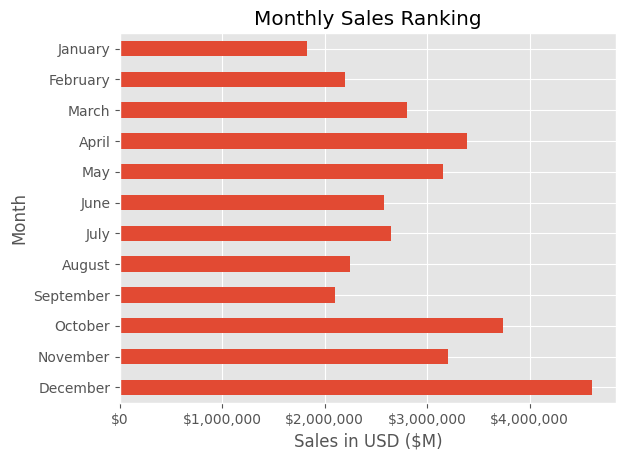

In [20]:
#plot monthly sales
ax = best_sales_month["sales"].plot(kind="barh", title="Monthly Sales Ranking")
ax.set_xlabel("Sales in USD ($M)")
ax.set_ylabel("Month")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) #format
plt.show()
#December was the best sales month with ~4.6 mil $

### Question2: What city had the highest number of sales?

In [21]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_month_name,sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99


In [22]:
#extract city from purchase_address
city = df["purchase_address"].str.split(",").str[1] 

In [23]:
df["city"] = city

In [24]:
best_cities_sales = df.groupby("city")[["sales"]].sum().sort_values(by="sales", ascending=False)
best_cities_sales

,sales
city,
San Francisco,"8,262,203.91"
Los Angeles,"5,452,570.80"
New York City,"4,664,317.43"
Boston,"3,661,642.01"
Atlanta,"2,795,498.58"
Dallas,"2,767,975.40"
Seattle,"2,747,755.48"
Portland,"2,320,490.61"
Austin,"1,819,581.75"


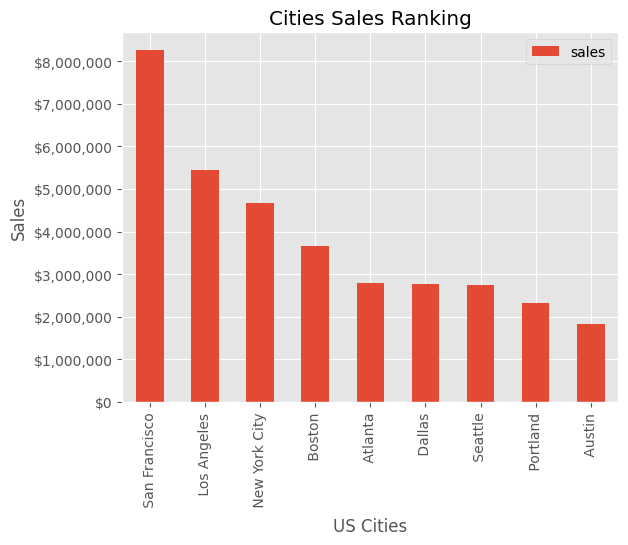

In [25]:
#plot cities sales ranking
ax = best_cities_sales.plot(kind="bar", title="Cities Sales Ranking")
ax.set_xlabel("US Cities")
ax.set_ylabel("Sales")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}')) #format
plt.show()

### Question3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [26]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_month_name,sales,city
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,January,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,January,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,January,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,January,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,January,11.99,Austin


In [27]:
time_sales_mean = df.groupby(df["order_date"].dt.hour)[["sales"]].mean()
time_sales_sum = df.groupby(df["order_date"].dt.hour)[["sales"]].sum()

In [28]:
# Plot Total Sales as Timeseries (Hourly)
def plot_hourly_sales(df, title, format=False):
    ax = sns.lineplot(x="order_date", y="sales", data=df)
    ax.set(xlabel='Time Hours', ylabel='Total Sales', title=title)
    if(format):
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
    plt.show()

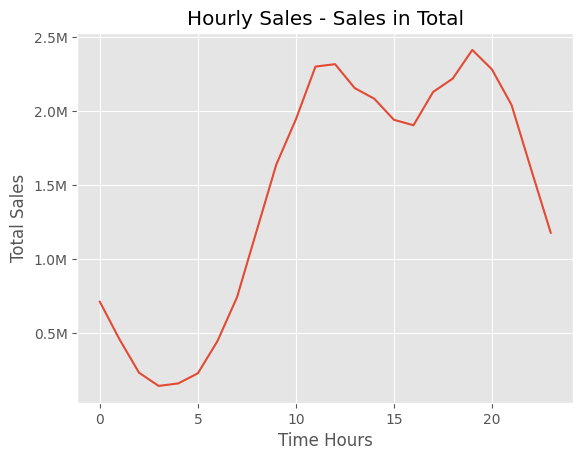

In [32]:
plot_hourly_sales(time_sales_sum, "Hourly Sales - Sales in Total", True)
# Adverts can be effective before midday and around 6pm

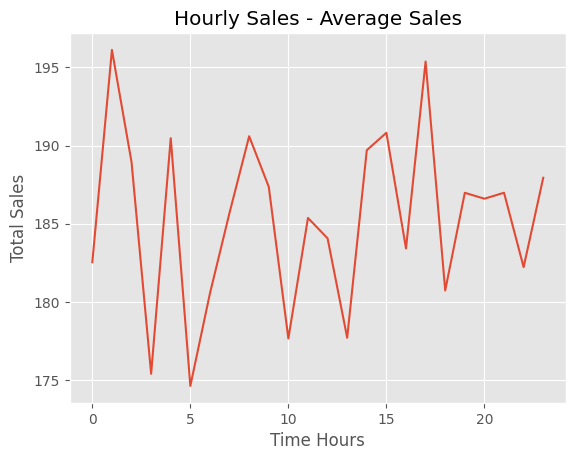

In [33]:
plot_hourly_sales(time_sales_mean, "Hourly Sales - Average Sales", False)
#after midnight (1am) & afternoon people tend to buy the most ~200dollars

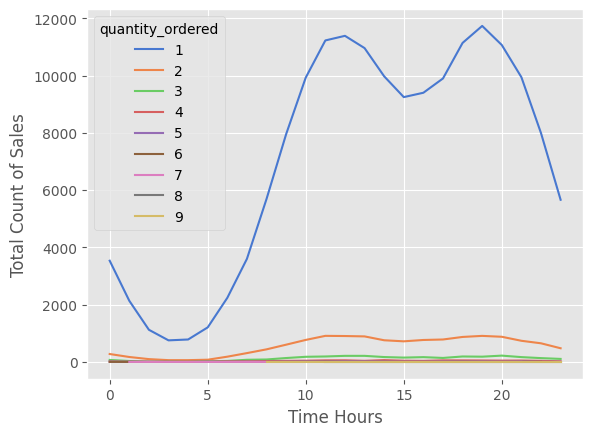

In [34]:
# Total Hourly Count of Sales 
time_sales_count = df.groupby([df["order_date"].dt.hour, df["quantity_ordered"]])[["order_id"]].count()

ax = sns.lineplot(x="order_date", y="order_id", hue="quantity_ordered", palette="muted", data=time_sales_count) 
ax.set(xlabel='Time Hours', ylabel='Total Count of Sales')
plt.show()

### Question4: What products are most often sold together?

In [35]:
duplicate_orderIds = df[df["order_id"].duplicated(keep=False)]
duplicate_orderIds.head(4)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_month_name,sales,city
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,January,11.95,Austin
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,January,11.99,Austin
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,January,150.00,Los Angeles
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,January,11.52,Los Angeles


In [36]:
grouped_orders = df.groupby("order_id")["product"].agg(list).reset_index()

In [37]:
grouped_orders.head()

,order_id,product
0,141234,[iPhone]
1,141235,[Lightning Charging Cable]
2,141236,[Wired Headphones]
3,141237,[27in FHD Monitor]
4,141238,[Wired Headphones]


In [78]:
#get only duplicated order_ids (products bought together)
duplicate_orderIds = df[df.duplicated('order_id', keep=False)].sort_values("order_id").set_index("order_id")
duplicate_orderIds.head()

,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_month_name,sales,city
order_id,,,,,,,,,
141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,January,11.95,Austin
141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,January,11.99,Austin
141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,January,150.00,Los Angeles
141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,January,11.52,Los Angeles
141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,January,400.00,New York City


In [145]:
multiple_orders = duplicate_orderIds[["product", "price_each", "sales"]]
multiple_orders.head()

,product,price_each,sales
order_id,,,
141275,USB-C Charging Cable,11.95,11.95
141275,Wired Headphones,11.99,11.99
141290,Apple Airpods Headphones,150.00,150.00
141290,AA Batteries (4-pack),3.84,11.52
141365,Vareebadd Phone,400.00,400.00


In [115]:
grouped_orders = multiple_orders.groupby(multiple_orders.index).agg({
    "product": tuple,              # combine products into a list
    "sales": "sum"                # sum up sales for the order
})

In [116]:
grouped_orders

,product,sales
order_id,,
141275,"(USB-C Charging Cable, Wired Headphones)",23.94
141290,"(Apple Airpods Headphones, AA Batteries (4-pack))",161.52
141365,"(Vareebadd Phone, Wired Headphones)",411.99
141384,"(Google Phone, USB-C Charging Cable)",611.95
141450,"(Google Phone, Bose SoundSport Headphones)",699.99
...,...,...
319536,"(Macbook Pro Laptop, Wired Headphones)","1,711.99"
319556,"(Google Phone, Wired Headphones)",611.99
319584,"(iPhone, Wired Headphones)",711.99


In [136]:
favorite_grouped_products = grouped_orders[grouped_orders.duplicated('product', keep=False)].sort_values("product")
favorite_grouped_products.head()

,product,sales
order_id,,
276692,"(20in Monitor, 20in Monitor)",219.98
171322,"(20in Monitor, 20in Monitor)",219.98
193916,"(20in Monitor, 20in Monitor)",219.98
301881,"(20in Monitor, 27in FHD Monitor)",259.98
157909,"(20in Monitor, 27in FHD Monitor)",259.98


In [138]:
favorite_grouped_products.loc[favorite_grouped_products["product"] == ("iPhone", "Lightning Charging Cable")]

,product,sales
order_id,,
177592,"(iPhone, Lightning Charging Cable)",729.90
308591,"(iPhone, Lightning Charging Cable)",714.95
183177,"(iPhone, Lightning Charging Cable)",714.95
180915,"(iPhone, Lightning Charging Cable)",714.95
142569,"(iPhone, Lightning Charging Cable)",714.95
...,...,...
260898,"(iPhone, Lightning Charging Cable)",714.95
208294,"(iPhone, Lightning Charging Cable)",714.95
207908,"(iPhone, Lightning Charging Cable)",714.95


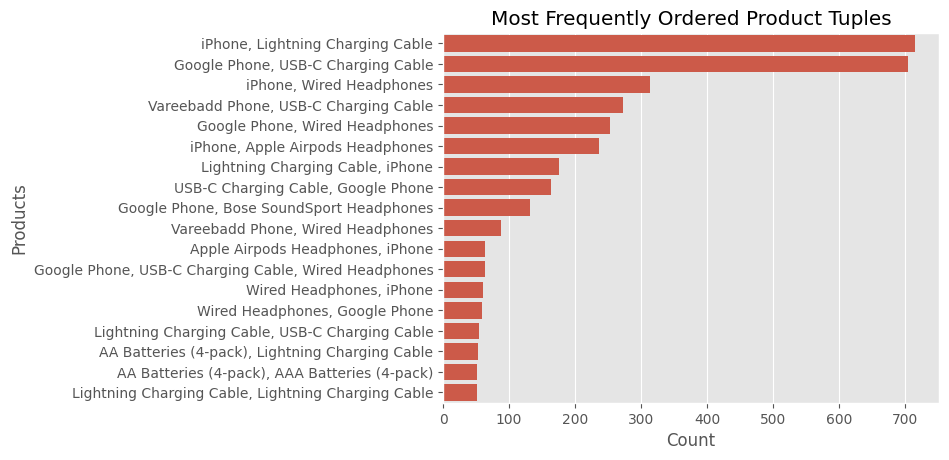

In [154]:
#exploded_products = favorite_grouped_products["product"].explode()

product_counts = favorite_grouped_products["product"].value_counts().head(18)

sns.barplot(x=product_counts.values, y=[", ".join(p) for p in product_counts.index])
plt.xlabel("Count")
plt.ylabel("Products")
plt.title("Most Frequently Ordered Product Tuples")
plt.show()